In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
sim = AerSimulator()

from util import zero, one, H, X

# Foundations II: Quantum Circuits for Multi-Qubit Systems

We will introduce quantum circuits that act on **multi-qubit** systems in this notebook. Multi-qubit circuits enable us to entangle qubits and harness the power of quantum computation.

References
1. [Introduction to Classical and Quantum Computing: Chapter 4](https://www.thomaswong.net/introduction-to-classical-and-quantum-computing-1e4p.pdf)

## Multi-Qubit Gates

The building blocks of quantum circuits that operate on multi-qubit systems are **multi-qubit** gates. A quantum gate $G$ that acts on two qubits can be represented as a $4 \times 4$ unitary matrix, i.e., $G \in \mathcal{U}(4)$. We'll start with a SWAP gate.

### Swap Gate

The SWAP gate swaps two qubits as below

$$
SWAP|q_2 q_1\rangle = |q_1 q_2\rangle \,.
$$

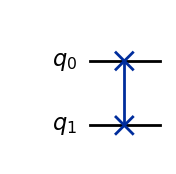

In [2]:
qc_swap = QuantumCircuit(2)
qc_swap.swap(0, 1)
qc_swap.draw(output="mpl", style="iqp")

#### Unitary Matrix for Swap Gate

Like single qubit gates, every two qubit gate also has a corresponding unitary matrix. In the case of a two qubit gate, we have a $4 \times 4$ unitary matrix. The unitary matrix for a SAWP gate is given below.

In [3]:
SWAP = Operator(qc_swap)
SWAP.draw("latex")

<IPython.core.display.Latex object>

In [4]:
# Swapping |10> to |01>
np.allclose((zero ^ one).evolve(SWAP), one ^ zero)

True

### CNOT Gate

1. The cnot gate is a two qubit gate with a **control qubit** and a **target qubit**.
2. If the control qubit is set, it flips the target qubit.
3. Otherwise, it does nothing.

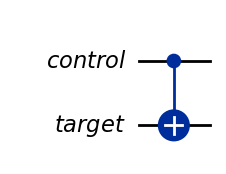

In [5]:
control = QuantumRegister(1, "control")
target = QuantumRegister(1, "target")
qc_cnot = QuantumCircuit(control, target)
qc_cnot.cx(0, 1)  # 0 is control, 1 is target
qc_cnot.draw(output="mpl", style="iqp")

The unitary matrix for a CNOT gate is given below.

In [6]:
CNOT = Operator(qc_cnot)
CNOT.draw("latex")

<IPython.core.display.Latex object>

In [7]:
# |00> -> |00> (reminder, little endian)
print((zero ^ zero).evolve(Operator(qc_cnot)))
# |01> -> |01> (reminder, little endian)
print((one ^ zero).evolve(Operator(qc_cnot)))
# |10> -> |11> (reminder, little endian)
print((zero ^ one).evolve(Operator(qc_cnot)))
# |11> -> |10> (reminder, little endian)
print((one ^ one).evolve(Operator(qc_cnot)))

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


### Toffoli gate

The Toffoli gate, notated CCX, is an example of a three qubit gate. A quantum gate $G$ that acts on three qubits can be represented as a $8 \times 8$ unitary matrix, i.e., $G \in \mathcal{U}(8)$.

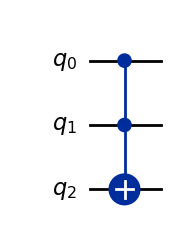

In [8]:
qc_ccx = QuantumCircuit(3)
qc_ccx.ccx(0, 1, 2)
qc_ccx.draw(output="mpl", style="iqp")

In [9]:
Operator(qc_ccx).draw("latex")   # another advantage of quantum circuits ...

<IPython.core.display.Latex object>

## Multi-Qubit Circuits

Similarly to single-qubit circuits, we can construct multi-qubit circuits out of single-qubit gates and multi-qubit gates. Multi-qubit gates can be sequenced and are reversible.

### Property 1: Gates in parallel correspond to tensor product

In a multi-qubit system, we can apply gates to different subset of qubits, i.e., in parallel. Below, we give an example where we apply an $H$ gate to $|q_0\rangle$ and a $X$ gate to $|q_1\rangle$.

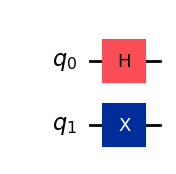

In [10]:
# 2-qubit system
qc_xh = QuantumCircuit(2)
qc_xh.h(0)
qc_xh.x(1)
qc_xh.draw(output="mpl", style="iqp")

The unitary matrix that corresponds to the two qubit gate that acts on $|q_1 q_0\rangle$ is given by $X \otimes H$ where $\otimes$ is the tensor product.

#### Aside: Tensor Product on Matrices

Let 

$$
A = \begin{pmatrix}
a_{11} & \dots & a_{1n} \\
\vdots & \ddots & \vdots \\
a_{n1} & \dots & a_{nn} \\
\end{pmatrix}
$$

and

$$
B^{(m \times m)} \,.
$$

Then

$$
A \otimes B
= 
\begin{pmatrix}
a_{11} B & \dots & a_{1n} B \\
\vdots & \ddots & \vdots \\
a_{1n} B & \dots & a_{nn} B \\
\end{pmatrix} \,.
$$

#### Example worked put

\begin{align*}
X \otimes H & = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix} \otimes \begin{pmatrix}
1/\sqrt{2} & 1/\sqrt{2} \\
1/\sqrt{2} & -1/\sqrt{2} \\
\end{pmatrix} \\
& = \begin{pmatrix}
0 & 0 & 1/\sqrt{2} & 1/\sqrt{2} \\
0 & 0 & 1/\sqrt{2} & -1/\sqrt{2} \\
1/\sqrt{2} & 1/\sqrt{2} & 0 & 0 \\
1/\sqrt{2} & -1/\sqrt{2} & 0 & 0 \\
\end{pmatrix}
\end{align*}

In [11]:
# Checking out our worked out example
Operator(qc_xh).draw("latex")

<IPython.core.display.Latex object>

### Property 2: Sequencing corresponds to matrix multiplication

We can also sequence multi-qubit gates as we did with single-qubit gates.

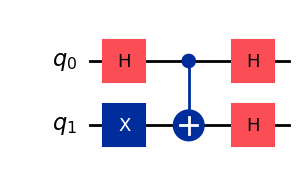

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.h(1)
qc.h(0)
qc.draw(output="mpl", style="iqp")

In matrix notation (again remembering little endian) ...
$$
qc = (H \otimes H) \, \text{CNOT} \, (X \otimes H)
$$

In [13]:
op = (X.tensor(H)).compose(CNOT).compose(H.tensor(H))
op.draw("latex")

<IPython.core.display.Latex object>

In [14]:
np.allclose(Operator(qc), op)

True

#### Property 3: Reversability

1. Recall that every unitary $U$ has a conjugate transpose $U^\dagger$ such that $UU^\dagger = I$.
2. Fact: $(ABC)^\dagger = C^\dagger B^\dagger A^\dagger$.

Thus
$$
((X \otimes H) \, \text{CNOT} \, (H \otimes H))^\dagger = (H \otimes H)^\dagger \, \text{CNOT}^\dagger \, (X \otimes H)^\dagger
$$

In [15]:
# cnot is its own inverse
CNOT.compose(CNOT).draw("latex")

<IPython.core.display.Latex object>

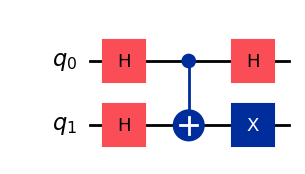

In [16]:
qc_rev = QuantumCircuit(2)
qc_rev.h(1)
qc_rev.h(0)
qc_rev.cx(0, 1)
qc_rev.h(0)
qc_rev.x(1)
qc_rev.draw(output="mpl", style="iqp")

In [17]:
# Should be close to identity
np.allclose(Operator(qc_rev).compose(Operator(qc)), np.eye(4))

True

## Entanglement

Multi-qubit circuits enable us to construct entangled qubits which we can harness to leverage the exponential representational capacity of a a system of $n$-qubits without incurring an exponential number of operations. Before we give an example of how to entangle qubits with a multi-qubit circuit, we'll discuss the situation where two qubits are not entangled in a multi-qubit system.

### Non-entangled Computations

As a reminder, two qubits are said to be entangled if they cannot be written as the tensor product of two single qubit systems. A multi-qubit circuit that acts on unentangled qubits can be thus be applied in parallel.

#### Example

Suppose we run two single qubit systems that are run in parallel.

In [18]:
# 2 circuits in parallel
qc_h = QuantumCircuit(QuantumRegister(1, "q_0")); qc_h.h(0)
qc_x = QuantumCircuit(QuantumRegister(1, "q_1")); qc_x.x(0);

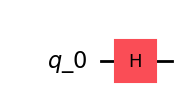

In [19]:
# Top part
qc_h.draw(output="mpl", style="iqp")

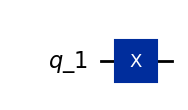

In [20]:
# Bottom part
qc_x.draw(output="mpl", style="iqp")

This is equivalent to this circuit from before.

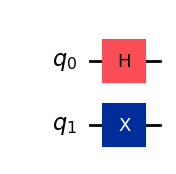

In [21]:
qc_xh.draw(output="mpl", style="iqp")

In [22]:
# Checking that the tensor product of the circuits gives the original multi-qubit circuit
np.allclose(X.tensor(H), Operator(qc))

False

### Constructing the Bell State: An Entangled State

Recall the Bell state

$$
\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$

was an entangled state. We can use a multi-qubit circuit to construct the Bell state, and thus, entangle two qubits.

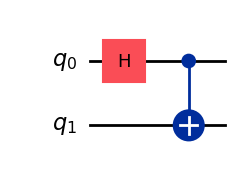

In [23]:
qc_bell = QuantumCircuit(2)
qc_bell.h(0)
qc_bell.cx(0, 1)
qc_bell.draw(output="mpl", style="iqp")

In [24]:
(zero ^ zero).evolve(Operator(qc_bell)).draw("latex")

<IPython.core.display.Latex object>

## Summary

1. We introduced multi-qubit gates, including the CNOT gate.
2. We saw that a multi-qubit circuits can be used to entangle qubits.